<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EA%B8%B0%EC%B4%88)_4%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(기초) 4주차 실습_답안

주제: 보스턴 집값 데이터로 분석하는 다중 선형 회귀 분석

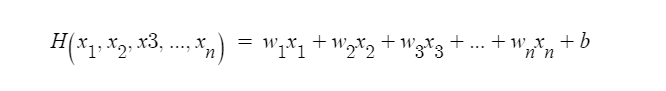

 - 다중 선형 회귀, 기본 방정식만 기억하고 가볼까요?




---


## 1. 라이브러리 import



*   **pandas**: 데이터프레임(표)를 활용할 때의 라이브러리
    
    자세한 정보는 https://pandas.pydata.org/ 참고

*   **numpy**: 행렬과 다차원 배열을 쉽게 처리하도록 지원하는 파이썬 라이브러리

  자세한 정보는 https://numpy.org/ 참고

*  **matplotlib**: 시각화 관련 함수들을 모아놓은 모듈(그래프를 그려준다!)

  자세한 정보는 https://matplotlib.org/ 참고
*  **statsmodel**: 통계 모듈 사용 라이브러리

  자세한 정보는https://www.statsmodels.org/stable/index.html 참고



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. 데이터 읽어오기

보스턴 집값 데이터를 읽어와봅시다! 구글 코랩에 외부 데이터를 불러오는 방법은 많습니다. 저희는 오늘은 로컬파일 시스템에서 파일을 업로드해볼게요.

*   참고 자료: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH










In [8]:
from google.colab import files
uploaded = files.upload()

Saving Boston_house.csv to Boston_house.csv


파일을 업로드한 뒤, io를 import한 뒤 csv 파일을 읽어줘야 합니다. io를 import하지 않으면 오류가 날 수 있기 때문입니다.



In [9]:
import io
boston = pd.read_csv(io.BytesIO(uploaded['Boston_house.csv']))

In [10]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


## 3. Target Data 분리


*   **.drop()**: 데이터 프레임 속 원소를 하나씩 지워 열을 삭제하는 것(분리 작업)
* **.head()**: 앞부분만 출력


In [12]:
# Feature에서 Target Data 분리
boston_data = boston.drop(['Target'],axis=1)

# Target 변수 저장
target = boston[['Target']]
x_data = boston[["CRIM","RM","LSTAT"]] #df[[col]] - DataFrame 형태로 컬럼 추출, df[col] - Series 형태로 컬럼 추출

x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


# 4. 회귀 분석



*   **.add_constant**: 상수항 결합을 위한 statsmodel의 함수
*   **.OLS(X, Y)**: 잔차제곱합을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
*   **.fit()**: 모델에 맞게 꽉 맞춰주는 함수
*   **.summary()**: 회귀 분석의 결과 출력


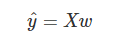

우리가 사용하는 예측 모형은 위와 같이 상수항이 결합된 선형 모형입니다!

In [13]:
# 회귀분석을 하기 위한 B_0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# 회귀 모델 적합
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

# summary 함수를 통해 OLS 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.01e-112
Time:                        06:05:03   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   **.params()**: 회귀 계수 출력



In [14]:
# 다중 선형 회귀 모델의 회귀 계수
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 5. 행렬 연산 다중 회귀 분석


*   **linalg.inv**: 주어진 행렬의 역을 계산
*   **np.dot**:행렬을 곱함



In [16]:
# 행렬 연산을 통해 beta구하기
# (X'X)^(-1)*X'Y

from numpy import linalg # 행렬의 역행렬을 구하기 위한 라이브러리

In [17]:
# 파이썬에서 역행렬 구하기
ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba, x_data1.T), target)
# 다중 선형 회귀 모델의 회귀계수와 일치

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

## 6. 시각화



*   **.resid.plot()**: 잔차도를 구하는 함수
    
    잔차도에 대한 자세한 정보는 https://zephyrus1111.tistory.com/54, https://www.statisticshowto.com/residual-plot/ 참고

*   **.xlabel("X축 이름")**: 그래프 X축의 이름을 붙이는 함수
*   **.show()**: 그래프 출력





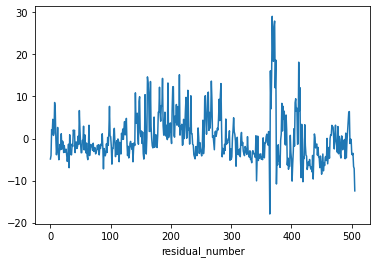

In [18]:
# y_hat 구하기
pred4 = fitted_multi_model.predict(x_data1)

# residual plot 구하기
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()



*   **.legend()**: 그래프의 범례 작성



## 7. 단순 선형 회귀와 비교하기

In [21]:
# 단순 선형 회귀 - DataFrame 형태로 추출
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

# DataFrame에 선형회귀분석을 위한 b0항 (상수항)을 더해주기
crim1 = sm.add_constant(crim, has_constant = "add")
rm1 = sm.add_constant(rm, has_constant = "add")
lstat1 = sm.add_constant(lstat, has_constant = "add")

# sm OLS 적합
model1 = sm.OLS(target, crim1)
model2 = sm.OLS(target, rm1)
model3 = sm.OLS(target, lstat1)

# model fit 시키기
fitted_model1 = model1.fit()
fitted_model2 = model2.fit()
fitted_model3 = model3.fit()

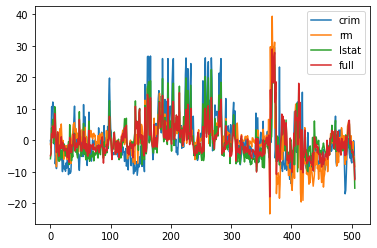

In [23]:
# 단순 선형 회귀
fitted_model1.resid.plot(label = "crim")
fitted_model2.resid.plot(label = "rm")
fitted_model3.resid.plot(label = "lstat")

# 다중 회귀 분석
fitted_multi_model.resid.plot(label = "full")
plt.legend()